<a href="https://colab.research.google.com/github/morekaccino/PricesLaw/blob/main/PricesLaw_RandomSpendingRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With Constant Spending

In [9]:
from enum import Enum
from random import randint, choice, random
import numpy as np
import matplotlib.pyplot as plt

In [10]:
n = 100
pop = np.ones((n, n))
class Direction(Enum):
  top = 0
  bottom = 1
  left = 2
  right = 3

In [11]:
def epoch():
  for i in range(len(pop)):
    for j in range(len(pop[i])):
      
      if pop[i, j] <= 0:
        continue

      spending_ratio = random()
      
      direction = choice(list(Direction))
      if direction == Direction.top:
        pop[(i-1) % n, j] += spending_ratio * pop[i, j]
      elif direction == Direction.bottom:
        pop[(i+1) % n, j] += spending_ratio * pop[i, j]
      elif direction == Direction.left:
        pop[i, (j-1) % n] += spending_ratio * pop[i, j]
      elif direction == Direction.right:
        pop[i, (j+1) % n] += spending_ratio * pop[i, j]
      else:
        raise Exception("None of the direction were matched.")
      pop[i, j] -= (spending_ratio * pop[i, j])
        


In [12]:
for q in range(2000):
  epoch()

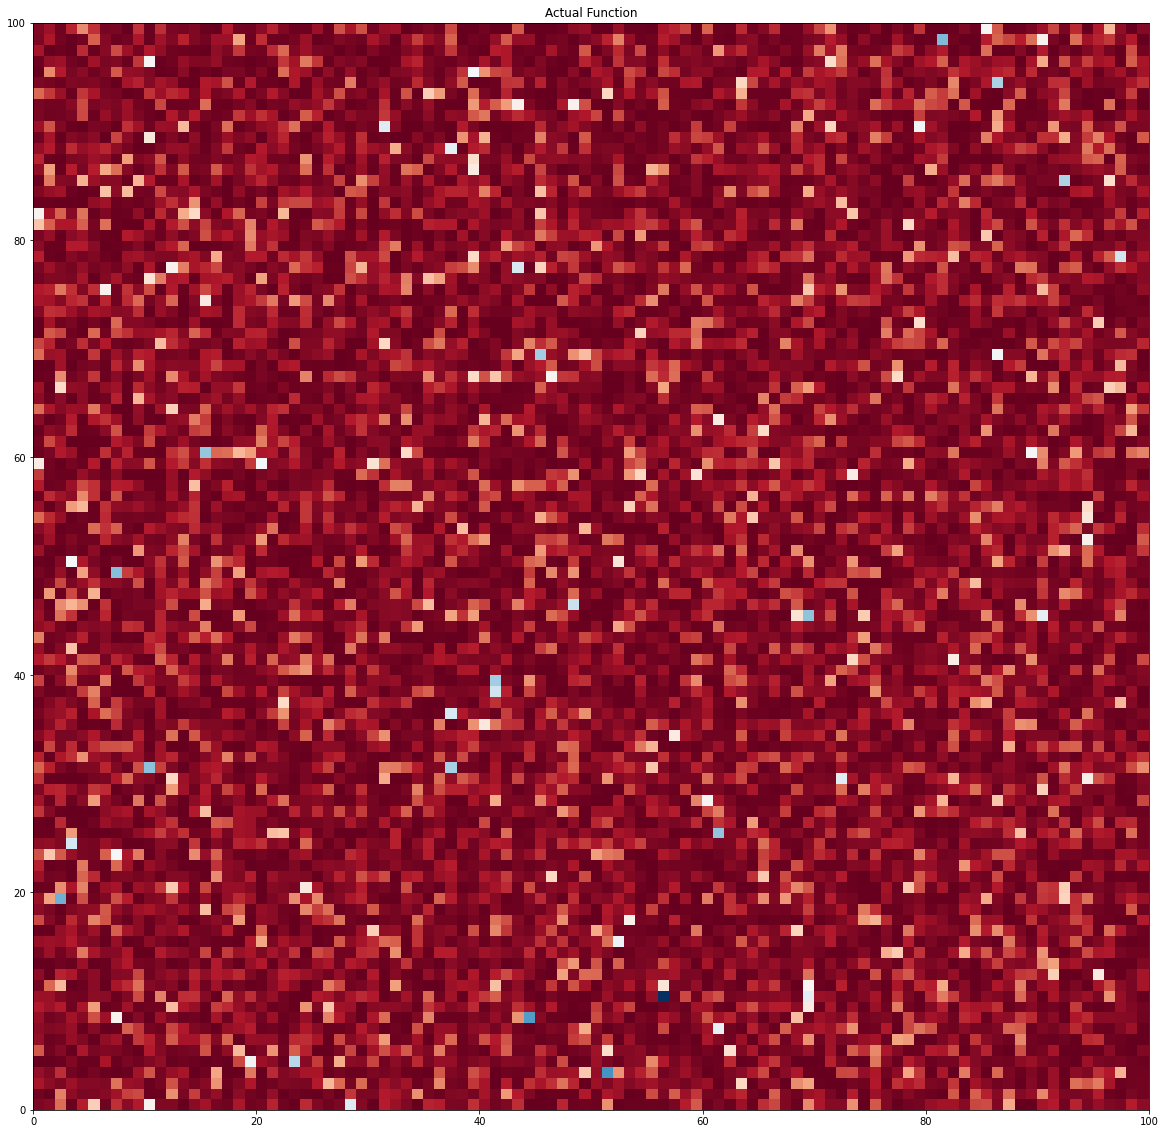

In [13]:
plt.figure(figsize=(20, 20))
plt.title('Actual Function')
heatmap = plt.pcolor(pop, cmap='RdBu')
plt.show()

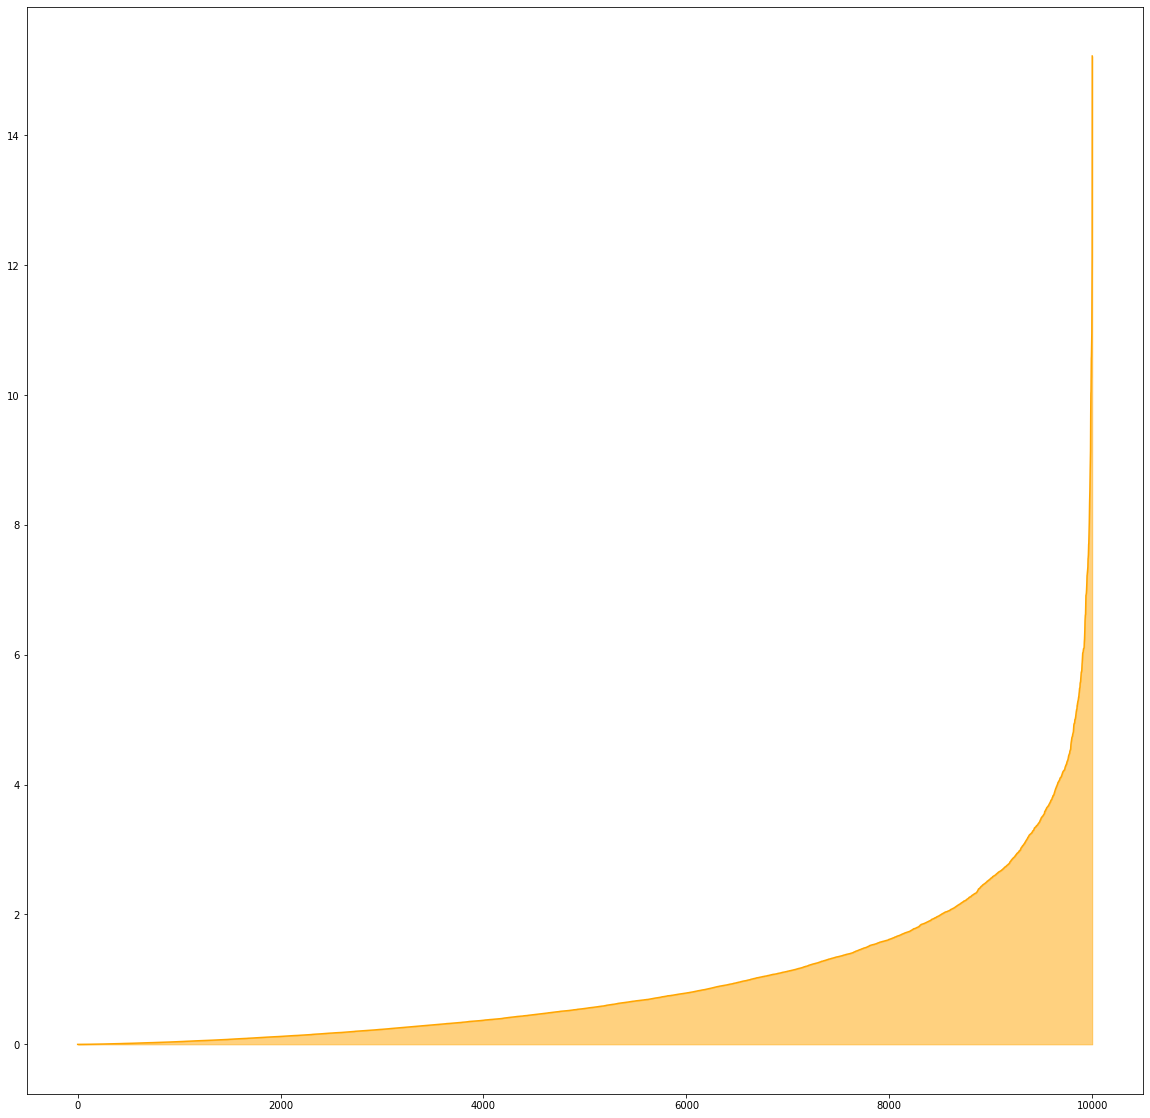

In [14]:
linear = np.copy(pop)
linear = linear.reshape(n*n)
linear = np.sort(linear)

plt.figure(figsize=(20, 20))
plt.fill_between(list(range(1, 10001)), linear, color='orange', alpha=0.5)
plt.plot(list(range(1, 10001)), linear, color='orange')

Lower 50 percent wealth possession: 1032<br>
Top 1 percent wealth pessession: 769<br>
$ratio = \frac{top \, 1 \, percent}{lower \, 50 \, percent} = \frac{769}{1032}=0.745$

In [15]:
# lower 50 percent
lower = sum(linear[0:n*n//2])
top1 =  sum(linear[(n*n)-((n*n)//100):])

print('lower 50%:',lower)
print('top one percent:',top1)

lower 50%: 1032.2198010344428
top one percent: 769.210717204856
